# imports

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
import seaborn as sb
from collections import Counter
import re
import os
import sys

# utilities

In [344]:
def countLetters(file):
    with open(file,encoding='utf-8') as f:
        c = Counter()
        for line in f:
            toLower = line.lower()
            regex = re.compile('[^a-z]')
            toLower = regex.sub('', toLower)
            c += Counter(toLower.strip())
    toRet = pd.DataFrame.from_dict(c, orient='index')
    toRet.columns = ['count']
    toRet = toRet.sort_index()
    toRet = toRet.fillna(0)
    return toRet
def countLettersInLine(line):
    toLower = line.lower()
    regex = re.compile('[^a-z]')
    toLower = regex.sub('', toLower)
    c = Counter(toLower.strip())
    toRet = countLetters("langs/pl/dbrit.txt")
    toRet['count'] = 0
    
    temp = pd.DataFrame.from_dict(c, orient='index')
    temp.columns = ['toDelete']
    temp = temp.sort_index()
    toRet = pd.concat([toRet,temp],axis=1)
    toRet = toRet.sort_index()
    toRet = toRet.fillna(0)
    toRet = toRet.drop(columns=['count'])
    return toRet

PTHSPLITTER = "\\"

In [398]:
class Perceptron:
    def __init__(self, language, theta=0, alpha=0.1, beta=0.1):
        self.language = language
        self.W = countLetters("langs/pl/dbrit.txt")
        self.W['count'] = np.random.rand(len(self.W['count']))
        self.theta = theta
        self.alpha = alpha
        self.beta = beta

    def calcLinear(self,X):
            return np.dot(self.W['count'],X)

    def discreteOut(self,X):
            return 1 if self.calcLinear(X) >= self.theta else 0
        
    def test_all(self,dir):
            truePositives = 0
            trueNegatives = 0
            falsePositives = 0
            falseNegatives = 0

            X = countLetters('langs/pl/dbrit.txt')
            X['count'] = 0

            for root, dirs, files in os.walk(dir):
                answer = 1 if root.split(PTHSPLITTER)[-1] == self.language else 0
                for file in files:
                    X['count'] = countLetters('langs/' + self.language + '/' + file)['count']
                    #normalize X
                    X['count'] = X['count'] / np.linalg.norm(X['count'])
                    if self.discreteOut(X['count']) == answer:
                        if answer == 1:
                            truePositives += 1
                        else:
                            trueNegatives += 1
                    else:
                        if answer == 1:
                            falsePositives += 1
                        else:
                            falseNegatives += 1
            return {"truePositives": truePositives, "trueNegatives": trueNegatives, "falsePositives": falsePositives, "falseNegatives": falseNegatives}

    def train(self,dir,epochs):
            guess = 0
            answer = 0
            
            X = countLetters('langs/pl/dbrit.txt')
            

            for i in range(epochs):
                for root, dirs, files in os.walk(dir): 
                    for file in files:
                        answer = 1 if root.split(PTHSPLITTER)[-1] == self.language else 0
                        openedFile = open('langs/' + self.language + '/' + file,encoding='utf-8')

                        for line in openedFile:
                            X = countLettersInLine(line)
                            #normalize X
                            X['toDelete'] = X['toDelete'] / np.linalg.norm(X['toDelete'])
                            guess = self.discreteOut(X['toDelete'])
                            if guess != answer:
                                self.W['count'] += self.alpha * (answer - guess) * X['toDelete']
                                self.theta -= self.beta * (answer - guess)
                                #normalize weights
                                self.W['count'] = self.W['count'] / np.linalg.norm(self.W['count'])
                                self.theta = self.theta / np.linalg.norm(self.W['count'])
             #normalize weights
            self.W['count'] = self.W['count'] / np.linalg.norm(self.W['count'])

    def guessLinear(self,lang):
        X = countLetters('langs/pl/dbrit.txt')
        X['count'] = 0
        X['count'] = countLetters(lang)
        X = X.fillna(0)
        X['count'] = X['count'] / np.linalg.norm(X['count'])
        return self.calcLinear(X['count'])
    def printProperties(self):
            print("Language: " + self.language)
            print("Theta: " + str(self.theta))
            print("Alpha: " + str(self.alpha))
            print("Beta: " + str(self.beta))
            print("Weights: " + str(self.W['count']))


# properties

In [389]:
theta = 0.1
alpha = 0.00001
beta = 0.0001
epochs = 100


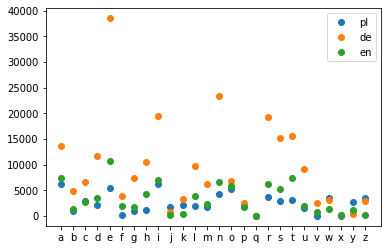

In [193]:
def plotForLang(lang,langsDir):
    X = countLetters("langs/pl/dbrit.txt")
    X['count'] = 0
    for root,dirs,files in os.walk(langsDir):
        if root.split('\\')[-1] == lang:
            for file in files:
                counted = countLetters('langs/'+ lang + "/" + file)
                X['count'] = X['count'] + counted['count']
    mpl.plot(X,'o')

plotForLang('pl','langs')
plotForLang('de','langs')
plotForLang('en','langs')

mpl.legend(['pl','de','en'])
mpl.show()



# perceptron training

Language: de
Theta: 0.14000000000000168
Alpha: 1e-05
Beta: 0.0001
Weights: a    0.273358
b    0.033721
c    0.277536
d    0.242629
e    0.178579
f    0.102068
g    0.328461
h    0.282698
i    0.051910
j    0.175567
k    0.182012
l    0.150872
m    0.122143
n    0.254091
o    0.041112
p    0.209999
q    0.228107
r    0.292697
s    0.008783
t    0.162757
u    0.053416
v    0.314999
w    0.024552
x    0.222624
y    0.027964
z    0.161728
Name: count, dtype: float64
Language: de
Theta: 0.14000000000000173
Alpha: 1e-05
Beta: 0.0001
Weights: a    0.083857
b    0.309957
c    0.288843
d    0.165665
e    0.289834
f    0.305248
g    0.213032
h    0.041541
i    0.203973
j    0.068544
k    0.158996
l    0.104713
m    0.188526
n    0.076256
o    0.303415
p    0.148085
q    0.162134
r    0.169064
s    0.308310
t    0.057601
u    0.085187
v    0.020928
w    0.180281
x    0.314758
y    0.139545
z    0.108866
Name: count, dtype: float64
Language: en
Theta: 0.14000000000000212
Alpha: 1e-05
Beta: 0.0001


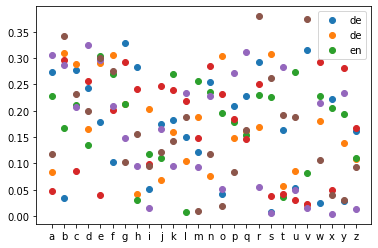

In [399]:
perceptronList = []
for root, dirs, files in os.walk('langs'):
    for file in files:
        perceptronList.append(Perceptron(root.split(PTHSPLITTER)[-1],theta,alpha,beta))
for Perc in perceptronList:
    Perc.train('langs',epochs)
    Perc.printProperties()
    mpl.plot(Perc.W,'o')
mpl.legend([perceptronList[0].language,perceptronList[1].language,perceptronList[2].language])
mpl.show()

# test

In [370]:
for perceptron in perceptronList:
    print(perceptron.language + ": " + str(perceptron.test_all('langs')))

de: {'truePositives': 2, 'trueNegatives': 0, 'falsePositives': 0, 'falseNegatives': 4}
de: {'truePositives': 2, 'trueNegatives': 0, 'falsePositives': 0, 'falseNegatives': 4}
en: {'truePositives': 2, 'trueNegatives': 0, 'falsePositives': 0, 'falseNegatives': 4}
en: {'truePositives': 2, 'trueNegatives': 0, 'falsePositives': 0, 'falseNegatives': 4}
pl: {'truePositives': 2, 'trueNegatives': 0, 'falsePositives': 0, 'falseNegatives': 4}
pl: {'truePositives': 2, 'trueNegatives': 0, 'falsePositives': 0, 'falseNegatives': 4}


# guess

In [402]:
p_guess = dict()
for perceptron in perceptronList:
    p_guess[perceptron.language] = perceptron.guessLinear("pasteFile.txt")

print(p_guess)
print(min(p_guess, key=p_guess.get))

{'de': 0.6874022082455259, 'en': 0.5577227449588266, 'pl': 0.696371323738519}
en
